/tmp/ipykernel_30088/386279743.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_30088/386279743.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha='right')


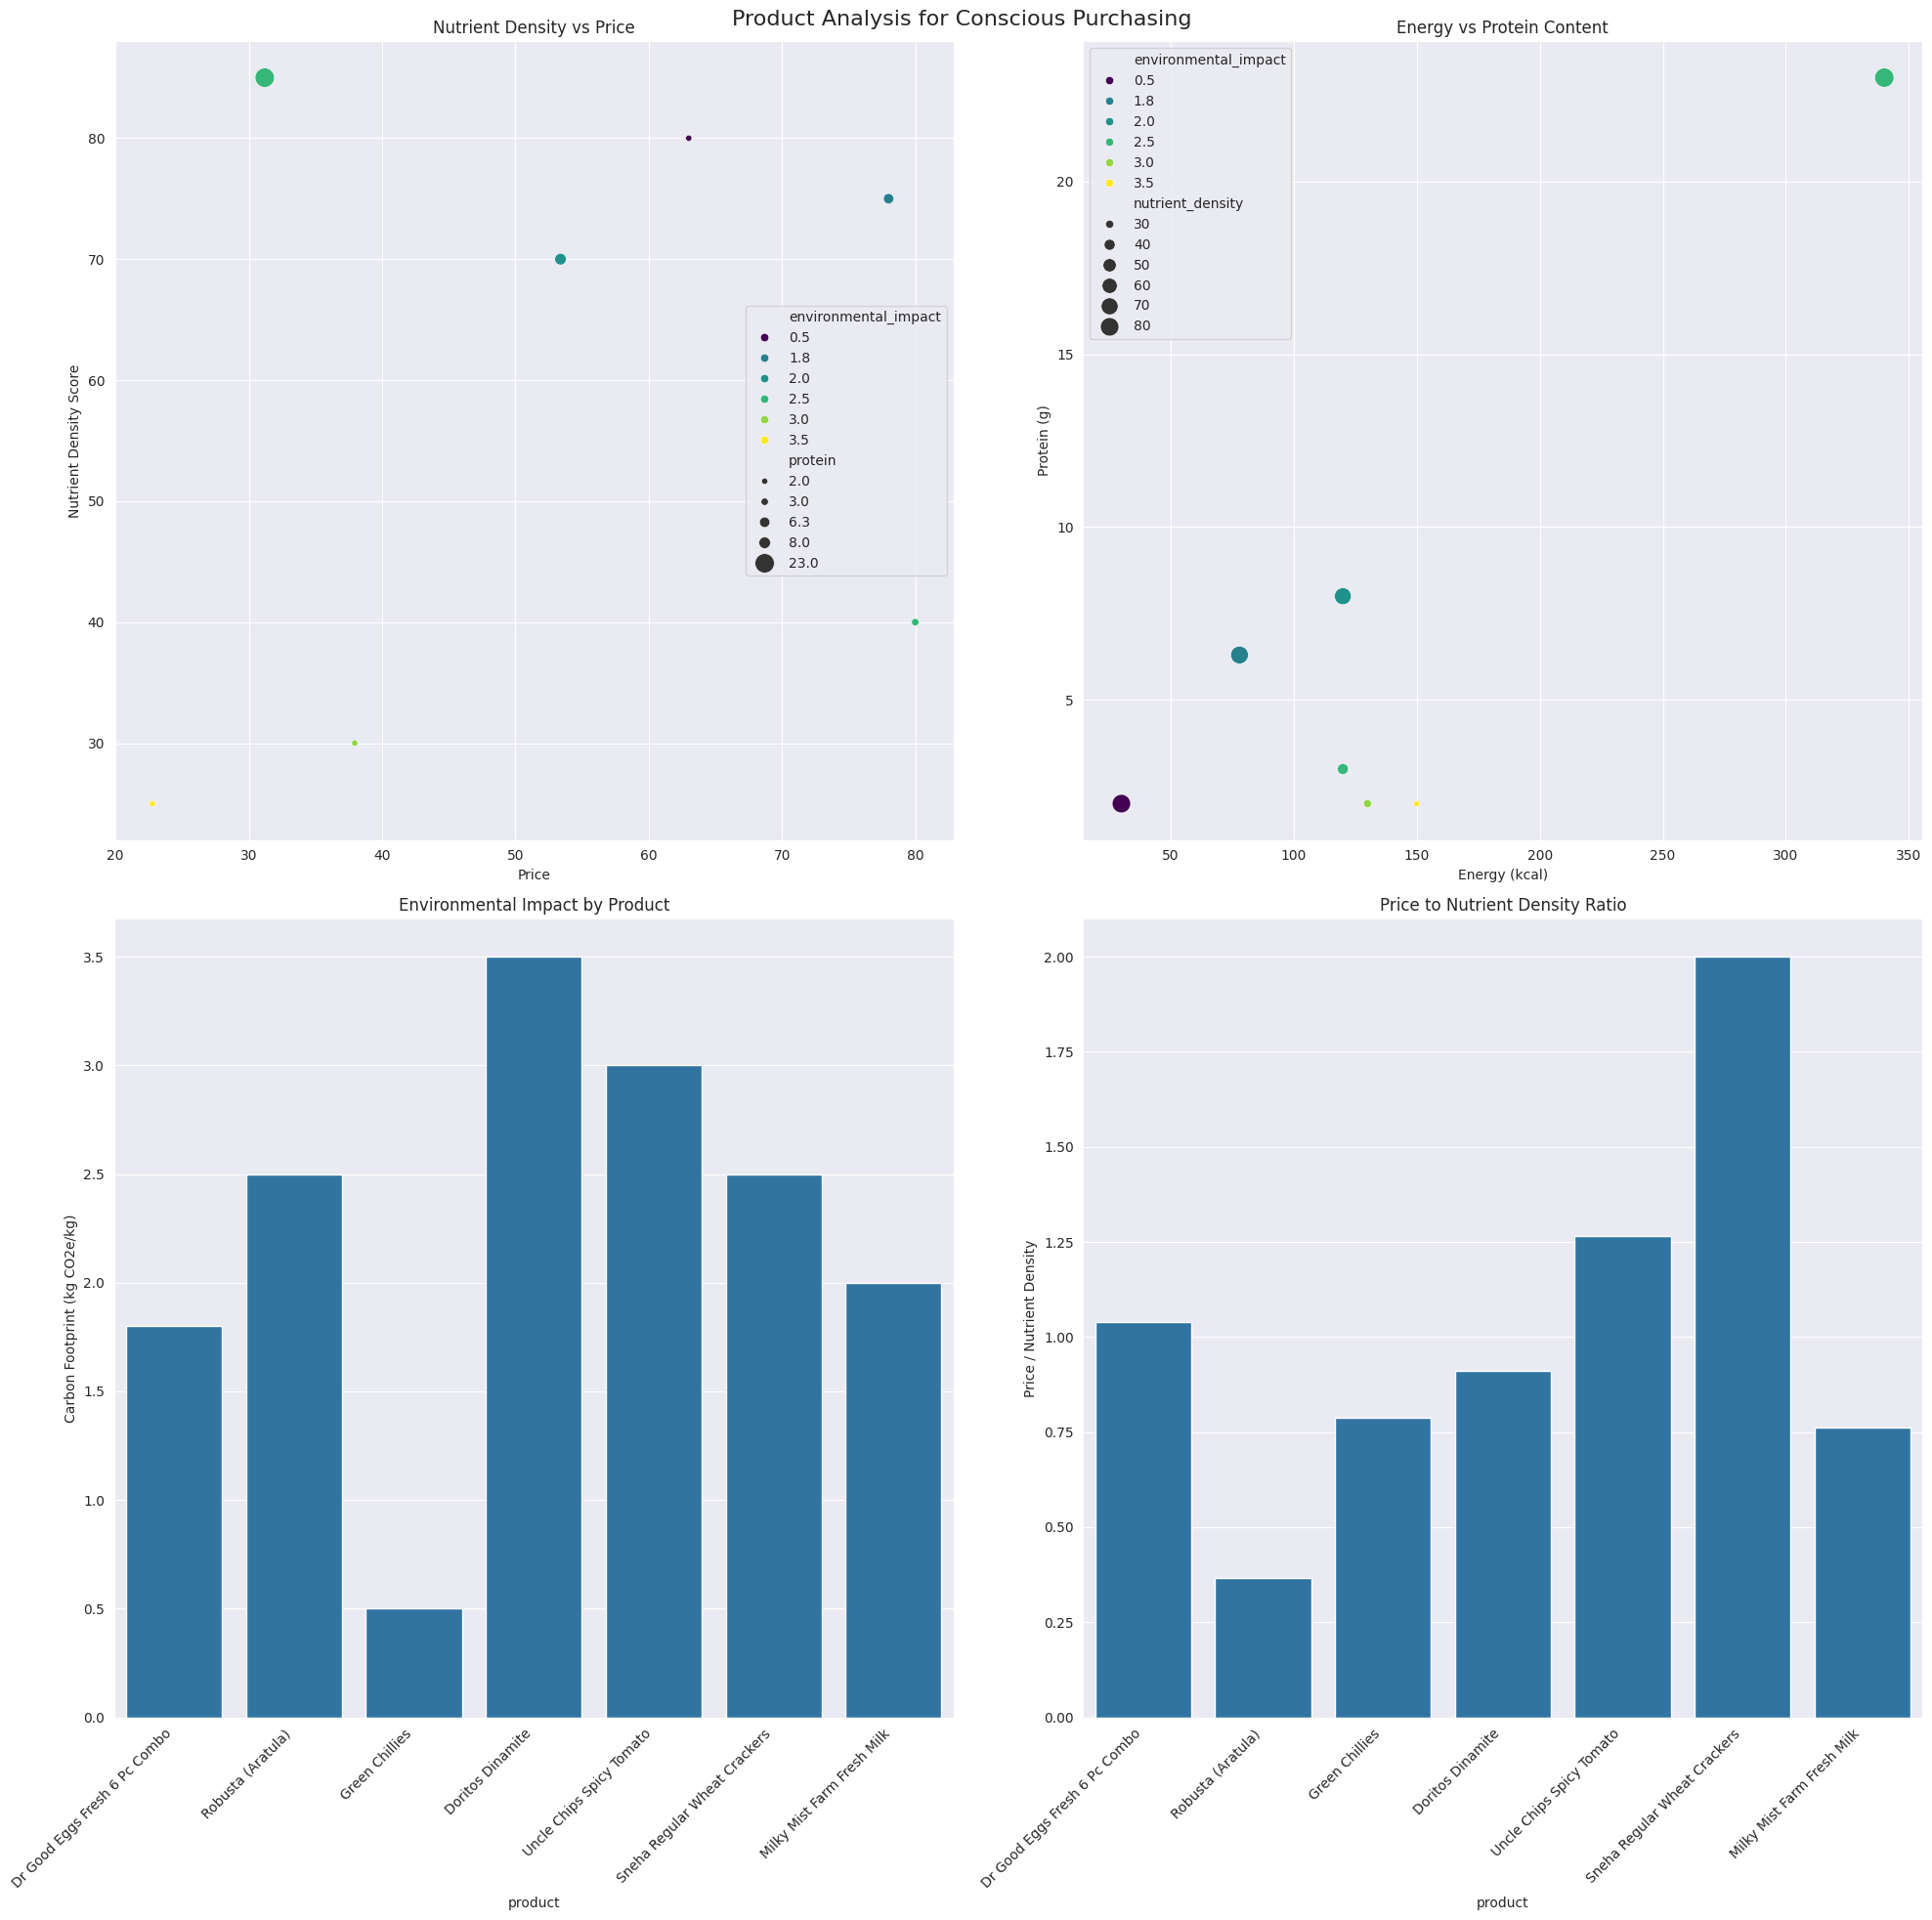

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dataframe from the product data
data = [
    {"product": "Dr Good Eggs Fresh 6 Pc Combo", "price": 78.00, "energy": 78, "protein": 6.3, "nutrient_density": 75, "environmental_impact": 1.8},
    {"product": "Robusta (Aratula)", "price": 31.20, "energy": 340, "protein": 23, "nutrient_density": 85, "environmental_impact": 2.5},
    {"product": "Green Chillies", "price": 63.01, "energy": 30, "protein": 2, "nutrient_density": 80, "environmental_impact": 0.5},
    {"product": "Doritos Dinamite", "price": 22.77, "energy": 150, "protein": 2, "nutrient_density": 25, "environmental_impact": 3.5},
    {"product": "Uncle Chips Spicy Tomato", "price": 37.95, "energy": 130, "protein": 2, "nutrient_density": 30, "environmental_impact": 3.0},
    {"product": "Sneha Regular Wheat Crackers", "price": 80.00, "energy": 120, "protein": 3, "nutrient_density": 40, "environmental_impact": 2.5},
    {"product": "Milky Mist Farm Fresh Milk", "price": 53.39, "energy": 120, "protein": 8, "nutrient_density": 70, "environmental_impact": 2.0}
]

df = pd.DataFrame(data)

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
fig.suptitle("Product Analysis for Conscious Purchasing", fontsize=16)

# 1. Nutrient Density vs Price
sns.scatterplot(data=df, x="price", y="nutrient_density", size="protein", hue="environmental_impact", 
                ax=axes[0, 0], sizes=(20, 200), palette="viridis")
axes[0, 0].set_title("Nutrient Density vs Price")
axes[0, 0].set_xlabel("Price")
axes[0, 0].set_ylabel("Nutrient Density Score")

# 2. Energy vs Protein Content
sns.scatterplot(data=df, x="energy", y="protein", size="nutrient_density", hue="environmental_impact", 
                ax=axes[0, 1], sizes=(20, 200), palette="viridis")
axes[0, 1].set_title("Energy vs Protein Content")
axes[0, 1].set_xlabel("Energy (kcal)")
axes[0, 1].set_ylabel("Protein (g)")

# 3. Environmental Impact vs Nutrient Density
sns.barplot(data=df, x="product", y="environmental_impact", ax=axes[1, 0])
axes[1, 0].set_title("Environmental Impact by Product")
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')
axes[1, 0].set_ylabel("Carbon Footprint (kg CO2e/kg)")

# 4. Price to Nutrient Density Ratio
df['price_nutrient_ratio'] = df['price'] / df['nutrient_density']
sns.barplot(data=df, x="product", y="price_nutrient_ratio", ax=axes[1, 1])
axes[1, 1].set_title("Price to Nutrient Density Ratio")
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha='right')
axes[1, 1].set_ylabel("Price / Nutrient Density")

plt.tight_layout()
plt.show()

In [8]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Sample data
data = [
    {
        "product_name": "Dr Good Eggs Fresh 6 Pc Combo",
        "price_paid": 78,
        "energy": {"per_serving": {"value": 78}},
        "macronutrients": {"total_fat": {"per_serving": {"value": 5}},
                           "carbohydrates": {"per_serving": {"value": 0.5}},
                           "protein": {"per_serving": {"value": 6}}},
        "micronutrients": {"sodium": {"per_serving": {"value": 60}}}
    },
    {
        "product_name": "Robusta (Aratula) Part Of Combo",
        "price_paid": 31.2,
        "energy": {"per_serving": {"value": 120}},
        "macronutrients": {"total_fat": {"per_serving": {"value": 0.5}},
                           "carbohydrates": {"per_serving": {"value": 25}},
                           "protein": {"per_serving": {"value": 2}}},
        "micronutrients": {"sodium": {"per_serving": {"value": 10}}}
    },
    # Add more products...
]

# Convert to a DataFrame for easier manipulation
df = pd.DataFrame(data)

# Extract relevant numeric columns
df['energy'] = df['energy'].apply(lambda x: x['per_serving']['value'])
df['fat'] = df['macronutrients'].apply(lambda x: x['total_fat']['per_serving']['value'])
df['carbohydrates'] = df['macronutrients'].apply(lambda x: x['carbohydrates']['per_serving']['value'])
df['protein'] = df['macronutrients'].apply(lambda x: x['protein']['per_serving']['value'])
df['sodium'] = df['micronutrients'].apply(lambda x: x['sodium']['per_serving']['value'])

# Select the features for clustering
X = df[['price_paid', 'energy', 'fat', 'carbohydrates', 'protein', 'sodium']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Print the clustered data
print(df[['product_name', 'cluster']])

# Visualize (Optional)
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions to 2D for visualization
pca = PCA(2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis')
plt.title('Product Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


ValueError: n_samples=2 should be >= n_clusters=3.

In [1]:
import matplotlib.pyplot as plt

# Categorize items and calculate total spend
categories = {
    'Proteins': ['Dr Good Eggs Premium Fresh 6 Pc', 'Town Grocer Kashmiri Rajma', 'Basic Kala Chana', 'Kitchen Gems Rajma Standard'],
    'Fruits': ['Robusta Banana (Arati Pandlu)'],
    'Snacks': ['Too Yumm - Naagin Sauce - Smoking Hot Bhoot Chips', 'Skippi Ice Pops Natural 3 Flavours Pink Guava Pineapple Lemon Carton'],
    'Non-Food': ['All Out Ultra Mosquito Repellent Liquid Vaporizer Machine 2 Refills']
}

# Calculate total spend for each category
category_spend = {cat: sum(float(item['price_paid']) for item in data if item['product_name'] in products) 
                  for cat, products in categories.items()}

# Prepare data for pie chart
labels = list(category_spend.keys())
sizes = list(category_spend.values())

# Create pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Grocery Spending by Category')

# Add legend
plt.legend(loc='best')

plt.show()

NameError: name 'data' is not defined

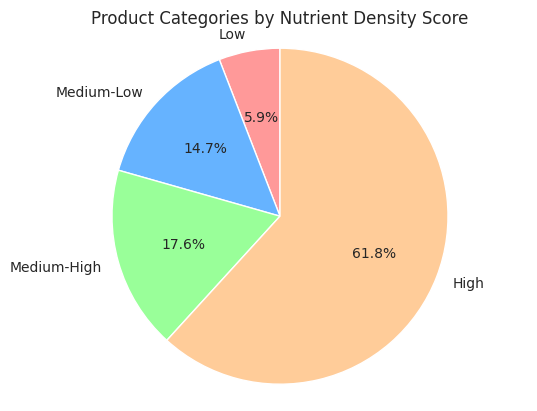

In [7]:
import matplotlib.pyplot as plt

# Define the data
products = [
    {"name": "Too Yumm - Naagin Sauce - Smoking Hot Bhoot Chips", "nutrient_density_score": 5, "estimated_quantity": 0.1},
    {"name": "All Out Ultra Mosquito Repellent Liquid Vaporizer Machine 2 Refills", "nutrient_density_score": 0, "estimated_quantity": 0.2},
    {"name": "Town Grocer Kashmiri Rajma", "nutrient_density_score": 8, "estimated_quantity": 0.5},
    {"name": "Skippi Ice Pops Natural 3 Flavours Pink Guava Pineapple Lemon Carton", "nutrient_density_score": 3, "estimated_quantity": 0.5},
    {"name": "Dr Good Eggs Premium Fresh 6 Pc [Part Of Combo]", "nutrient_density_score": 7, "estimated_quantity": 0.6},
    {"name": "Robusta Banana (Arati Pandlu) [Part Of Combo]", "nutrient_density_score": 6, "estimated_quantity": 0.5},
    {"name": "Basic Kala Chana", "nutrient_density_score": 8, "estimated_quantity": 0.5},
    {"name": "Kitchen Gems Rajma Standard", "nutrient_density_score": 8, "estimated_quantity": 0.5}
]

# Define the categories based on nutrient density score
categories = {
    "Low": [],
    "Medium-Low": [],
    "Medium-High": [],
    "High": []
}

# Categorize the products based on nutrient density score
for product in products:
    score = product["nutrient_density_score"]
    if score <= 2:
        categories["Low"].append(product)
    elif score <= 4:
        categories["Medium-Low"].append(product)
    elif score <= 6:
        categories["Medium-High"].append(product)
    else:
        categories["High"].append(product)

# Calculate the total estimated quantity for each category
sizes = [sum(product["estimated_quantity"] for product in category) for category in categories.values()]

# Create a list of colors for each category
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Create the subdivided pie chart
fig, ax = plt.subplots()
ax.pie(sizes, colors=colors, labels=categories.keys(), autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add a title to the chart
plt.title("Product Categories by Nutrient Density Score")

# Display the chart
plt.show()

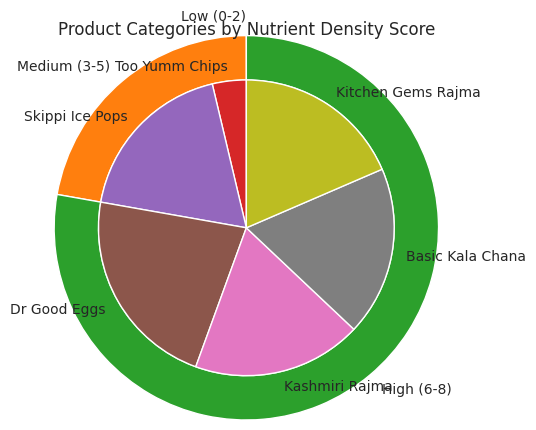

In [12]:
import matplotlib.pyplot as plt

# Sample data
products = [
    {"name": "Too Yumm Chips", "score": 5, "weight": 0.1},
    {"name": "Skippi Ice Pops", "score": 3, "weight": 0.5},
    {"name": "Dr Good Eggs", "score": 7, "weight": 0.6},
    {"name": "Kashmiri Rajma", "score": 8, "weight": 0.5},
    {"name": "Basic Kala Chana", "score": 8, "weight": 0.5},
    {"name": "Kitchen Gems Rajma", "score": 8, "weight": 0.5},
]

# Categorize products based on nutrient density score
categories = {
    'Low (0-2)': [],
    'Medium (3-5)': [],
    'High (6-8)': [],
}

for product in products:
    if product['score'] <= 2:
        categories['Low (0-2)'].append(product)
    elif 3 <= product['score'] <= 5:
        categories['Medium (3-5)'].append(product)
    else:
        categories['High (6-8)'].append(product)

# Prepare data for plotting
labels = []
sizes = []
sub_labels = []
sub_sizes = []

for category, items in categories.items():
    total_weight = sum(item['weight'] for item in items)
    labels.append(category)
    sizes.append(total_weight)
    
    for item in items:
        sub_labels.append(item['name'])
        sub_sizes.append(item['weight'])

# Plotting
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, radius=1.3, wedgeprops=dict(width=0.3), startangle=90)
ax.pie(sub_sizes, labels=sub_labels, radius=1, startangle=90)

plt.title('Product Categories by Nutrient Density Score')
plt.show()